<a href="https://colab.research.google.com/github/daikichiba9511/study_log/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [135]:
cd /content/drive/My\ Drive/Colab Notebooks/titanic

/content/drive/My Drive/Colab Notebooks/titanic


In [136]:
import pandas as pd 
train=pd.read_csv("./train.csv")
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [137]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [138]:
#欠損値の確認
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [159]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null int64
Parch         891 non-null int64
Fare          891 non-null int64
Embarked      891 non-null int64
Has_Cabin     891 non-null int64
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null float64
dtypes: float64(1), int64(10)
memory usage: 76.6 KB


In [160]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null int64
Parch         891 non-null int64
Fare          891 non-null int64
Embarked      891 non-null int64
Has_Cabin     891 non-null int64
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null float64
dtypes: float64(1), int64(10)
memory usage: 76.6 KB


In [139]:
#使用するライブラリのインポート
import pandas as pd
import numpy as np
import re
import sklearn
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
  
  
  

#しようするモデルのインポート
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
#cross_validationからKFoldはimportできない、model_selectionに入ってる
from sklearn.model_selection import KFold
  
import warnings
warnings.filterwarnings('ignore')
  

In [0]:
#データセットの読み込み
train = pd.read_csv("./train.csv")
test  = pd.read_csv("./test.csv")
  
#Passenger ID に簡単にアクセスできるようにしておく
PassengerId=test['PassengerId']
full_data=[train,test]


In [0]:
#データの整理、整形と新しい特徴量を追加していく
#欠損値も補完する

#乗客の名前の長さを追加
train['Name_length'] = train['Name'].apply(len)
test['Name_length']  = test['Name'].apply(len)

#客室ありの乗客かどうかを追加
train['Has_Cabin'] = train['Cabin'].apply(lambda x: 0 if type(x) == float else 1)
test['Has_Cabin']  = test['Cabin'].apply(lambda x:  0 if type(x) == float else 1)

#同乗した兄弟、配偶者の人数(SibSp)と同乗した親。子供の人数(Parch)からファミリーサイズを追加する
for dataset in full_data:
  dataset['FamilySize'] = dataset['SibSp']+dataset['Parch'] + 1
  
#ファミリーサイズから１名の乗客かどうかを追加する
for dataset in full_data:
  dataset['IsAlone']=0
  #datasetの行ラベルを指定、列のfamilysizeが１のとこはisaloneに１を代入
  dataset.loc[dataset['FamilySize']==1, 'IsAlone']=1
  
#乗船した港（Embarked）に欠損値があるので Southmptonで補完する
#C=Cherbourg,Q=Queenstown,S=Southmpton
for dataset in full_data:
  dataset['Embarked'] = dataset['Embarked'].fillna('S')
  
#運賃（ Fare）に欠損値があるから、中央値で補完
for dataset in full_data:
  dataset['Fare']=dataset['Fare'].fillna(train['Fare'].median())
  
#年齢に欠損値があるから、平均と標準偏差から乱数を生成し、補完する
for dataset in full_data:
  #年齢の平均
  age_ave = dataset['Age'].mean()
  #年齢の標準偏差
  age_std = dataset['Age'].std()
  age_null_count = dataset['Age'].isnull().sum()
  age_null_random_list =np.random.randint(age_ave - age_std, age_ave + age_std, size=age_null_count)
  #datasetのAgeのカラムで欠損値age_nulll_random_listを代入
  dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
  dataset['Age'] = dataset['Age'].astype(int)
  
  
#乗客の名前から敬称（MrやMsなど）を抽出してくる関数を定義する
def get_title(name):
  title_search  = re.search(' ([A-Za-z]+)\.',name)
  if title_search:
    return title_search.group(1)
  
  return ""

#乗客の名前 (Name)から敬称を抽出し、追加する
for dataset in full_data:
  dataset['Title'] = dataset['Name'].apply(get_title)
  
#敬称(Title)をグルーピングしたもので書き換える
for dataset in full_data:
  dataset['Title'] = dataset['Title'].replace(['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona'],'Rare')
  
  dataset['Title'] = dataset['Title'].replace('Mile','Miss')
  dataset['Title'] =dataset ['Title'].replace('Ms','Miss')
  dataset['Title'] = dataset['Title'].replace('Mme','Mrs')
  
#データの整形
for dataset in full_data:
  #性別(Sex)を定数化する
  dataset['Sex'] = dataset['Sex'].map( {'female':0,'male':1}).astype(int)
  
  #敬称(Title)を定数化する
  title_mapping = {"Mr":1,"Miss":2,"Mrs":3,"Master":4,"Rare":5}
  dataset['Title'] = dataset['Title'].map(title_mapping)
  #敬称(Title)がないレコードを０埋め
  dataset['Title'] = dataset['Title'].fillna(0)
  
  #乗船した港(Embarked)を定数化する
  dataset['Embarked'] = dataset['Embarked'].map({'S':0,'C':1,'Q':2})
  
  #運賃を定数化する
  dataset.loc[dataset['Fare']<=7.91,'Fare']                                                     =0
  dataset.loc[(dataset['Fare']>7.91)&(dataset['Fare']<=14.454),'Fare']   =1
  dataset.loc[(dataset['Fare']>14.454)&(dataset['Fare']<=31),'Fare']      =2
  dataset.loc[dataset['Fare']>31,'Fare']                                                           =3
  dataset['Fare'] = dataset['Fare'].astype(int)
  
   
  #年齢を定式化する。
  dataset.loc[ dataset['Age'] <= 16, 'Age']                          = 0
  dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
  dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
  dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
  dataset.loc[ dataset['Age'] > 64, 'Age'] = 4 ;

  
#特徴量の選択（不要なカラムを落とす。）
drop_elements = ['PassengerId','Name','Ticket','Cabin','SibSp','Name_length']
train = train.drop(drop_elements,axis=1)
test  = test.drop (drop_elements,axis=1)



  
  
  
  
  
  
  

In [164]:
train.head(3)

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,0,3,1,1,0,0,0,0,2,0,1.0
1,1,1,0,2,0,3,1,1,2,0,3.0
2,1,3,0,1,0,1,0,0,1,1,2.0


In [165]:
test.head(3)

,Pclass,Sex,Age,Parch,Fare,Embarked,Has_Cabin,FamilySize,IsAlone,Title
0,3,1,2,0,0,2,0,1,1,1
1,3,0,2,0,0,0,0,2,0,3
2,2,1,3,0,1,2,0,1,1,1


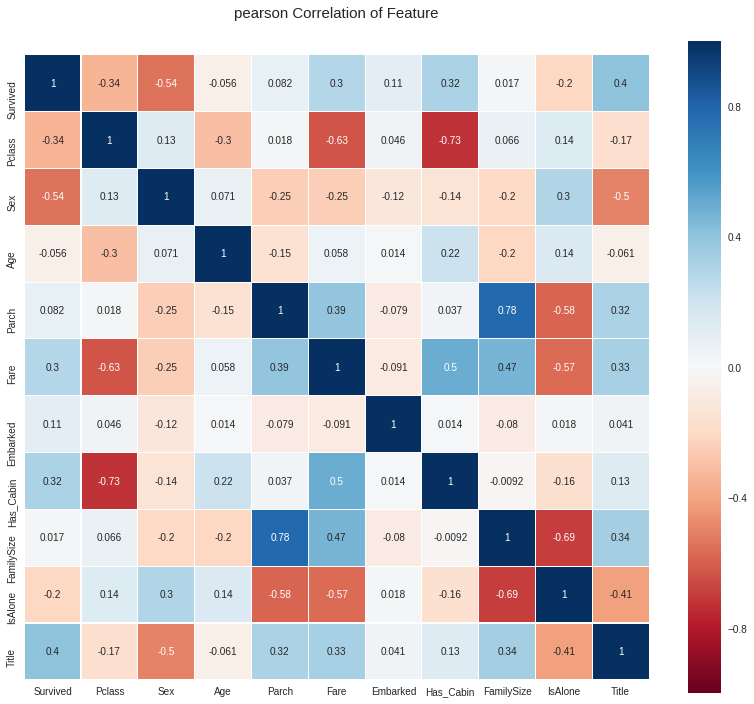

In [166]:
colormap =plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('pearson Correlation of Feature',y=1.05,size=15)
sns.heatmap(train.astype(float).corr(),linewidth=0.1,vmax=1.0,
                        square=True,cmap=colormap,linecolor='white',annot=True)

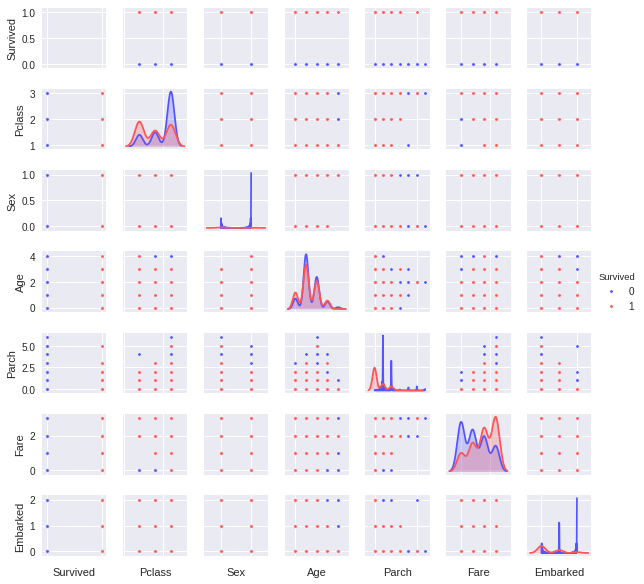

In [167]:
g=sns.pairplot(train[[u'Survived',u'Pclass',u'Sex',u'Age',u'Parch',u'Fare',u'Embarked']],
                          hue='Survived',palette='seismic',size=1.2,diag_kind='kde',diag_kws=dict(shade=True),plot_kws=dict(s=10))
g.set(xticklabels=[])

In [0]:
#便利なパラメータを後で使えるようにしておく
ntrain = train.shape[0]
ntest = test.shape[0]

#交差検証の回数
NFOLDS=5
#同じ乱数を発生させるための固定値
SEED=0

#パラメタの検証、学習モデルの制度を評価
#交差検証（クロスバリデーション）でパラメタを検証し、精度がよく、過学習怒らないパラメタを決定
kf = KFold( n_splits=NFOLDS,random_state=SEED).split(train)

#Sklearn classifierを拡張
class SklearnHelper(object):
  def __init__(self,clf,seed=0,params=None):
    params['random_state']=seed
    self.clf = clf(**params)
    
  def train(self,x_train,y_train):
    self.clf.fit(x_train,y_train)
    
  def predict(self,x):
    return self.clf.predict(x)
  
  def fit(self,x,y):
    return self.clf.fit(x,y)
  
  def feature_importances(self,x,y):
    print(self.clf.fit(x,y).feature_importances_)
  
  
  
def get_oof(clf,x_train,y_train,x_test):
  oof_train = np.zeros((ntrain,))
  oof_test =np.zeros((ntest,))
  oof_test_skf=np.empty((NFOLDS,ntest))
  
  for i , (train_index,test_index) in enumerate(kf):
    x_tr = x_train[train_index]
    y_tr = y_train[train_index]
    x_te= x_train[test_index]
    
    clf.train(x_tr,y_tr)
    
    
    oof_train[test_index] = clf.predict(x_te)
    oof_test_skf[  i,  :  ] = clf.predict(x_test)
    
  oof_test[:] =oof_test_skf.mean(axis=0)
  return oof_train.reshape(-1,1),oof_test.reshape(-1,1)


In [170]:

#モデルのパラメタ定義
#random forestのパラメタ
rf_params = {
    'n_jobs':  -1,
    'n_estimators': 500,
    'warm_start': True,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'verbose': 0
}

#Extra Trees のパラメタ
et_params = {
    'n_jobs':  -1,
    'n_estimators':  500,
    #'max_feature': 0.5
    'max_depth':  8,
    'min_samples_leaf':  2,
    'verbose': 0
} 

#AdaBoostのパラメタ
ada_params = {
    'n_estimators':500,
    'learning_rate':0.75
}

#Gradient Boosting のパラメタ
gb_params = {
    'n_estimators':500,
    #'max_depth:0.2'
    'max_depth':5,
    'min_samples_leaf':2,
    'verbose':0
}

#Support Vector Classifierのパラメタ
svc_params = {
    'kernel':'linear',
    'C':0.025}

#モデルのオブジェクト生成
rf = SklearnHelper(clf=RandomForestClassifier,
                   seed=SEED,params=rf_params)
et = SklearnHelper(clf=ExtraTreesClassifier,
                   seed=SEED,params=et_params)
ada =SklearnHelper(clf=AdaBoostClassifier,
                   seed=SEED,params=ada_params)
gb=SklearnHelper(clf=GradientBoostingClassifier,
                 seed=SEED,params=gb_params)
svc=SklearnHelper(clf=SVC,
                  seed=SEED,params=svc_params)

#学習データの生存(Survived)データ、学習データ、テストデータで配列を作成
y_train =train['Survived'].ravel()
train= train.drop(['Survived'],axis=1)
x_train=train.values
x_test=test.values

#第１段階の学習と予測を実行
et_oof_train,et_oof_test = get_oof(et,x_train,y_train,x_test)#Extra Trees Classifier
rf_oof_train,rf_oof_test = get_oof(rf,x_train,y_train,x_test)#Random Forest Classifier
ada_oof_train,ada_oof_test = get_oof(ada,x_train,y_train,x_test)#AdaBoost Classifier
gb_oof_train,gb_oof_test = get_oof(gb,x_train,y_train,x_test)#Gradient Boosting Classifier
svc_oof_train,svc_oof_test =get_oof(svc,x_train,y_train,x_test)#Support Vector Classifier




print("Training is complete")








Training is complete


In [171]:
train.shape,test.shape

((891, 10), (418, 10))

In [172]:
x_train.shape,y_train.shape,x_test.shape

((891, 10), (891,), (418, 10))

In [0]:
#第１段階の予備段階をインプット
x_train = np.concatenate((et_oof_train,rf_oof_train,ada_oof_train,gb_oof_train,svc_oof_train),axis=1)
x_test = np.concatenate((et_oof_test,rf_oof_test,ada_oof_test,gb_oof_test,svc_oof_test),axis=1)
#第２段階の学習と予測を実行する
gbm = xgb.XGBClassifier(n_estimators=2000,max_depth = 4,min_child_weight=2,gamma=0.9,subsample=0.8
                                            ,colsample_bytree=0.8,objective='binary:logistic',nthread= -1,scale_pos_weight=1).fit(x_train,y_train)

predictions =gbm.predict(x_test)

#予測結果をCSV出力
StackingSubmission=pd.DataFrame({'PassengerId':PassengerId,'Survived':predictions})
StackingSubmission.to_csv("StackingSubmission.csv",index=False)


In [0]:
test.head(5)

In [0]:
train.head(5)

In [0]:
print(x_train)

In [0]:
x_test.shape


In [0]:
x_train.shape

In [0]:
train.describe()